In [ ]:
!wget https://www.csee.umbc.edu/courses/graduate/678/spring23/materials/mnist_rowmajor.jsonl.gz

--2023-03-10 01:03:37--  https://www.csee.umbc.edu/courses/graduate/678/spring23/materials/mnist_rowmajor.jsonl.gz
Resolving www.csee.umbc.edu (www.csee.umbc.edu)... 23.185.0.4, 2620:12a:8001::4, 2620:12a:8000::4
Connecting to www.csee.umbc.edu (www.csee.umbc.edu)|23.185.0.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://redirect.cs.umbc.edu/courses/graduate/678/spring23/materials/mnist_rowmajor.jsonl.gz [following]
--2023-03-10 01:03:38--  https://redirect.cs.umbc.edu/courses/graduate/678/spring23/materials/mnist_rowmajor.jsonl.gz
Resolving redirect.cs.umbc.edu (redirect.cs.umbc.edu)... 130.85.36.80
Connecting to redirect.cs.umbc.edu (redirect.cs.umbc.edu)|130.85.36.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27428927 (26M) [application/x-gzip]
Saving to: ‘mnist_rowmajor.jsonl.gz’

mnist_rowmajor.json 100%[===================>]  26.16M  9.69MB/s    in 2.7s    

2023-03-10 01:03:42 (9.69 MB/s) - ‘mnist_rowmajor.js

In [ ]:
import pandas as pd
import json,gzip
with gzip.open('mnist_rowmajor.jsonl.gz','rb') as fp:
  data=[json.loads(line) for line in fp]

In [ ]:
print(len(data))
print(data[0])
df = pd.DataFrame(data)
print(df.shape)
print(df['image'][0])

70000
{'image': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8117647171020508, 0.8156862854957581, 0.07058823853731155, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8078431487083435, 0.9921568632125854, 0.5647059082984924, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [ ]:

x=df['image'].tolist()
y=df['label'].tolist()
print(x)
print(len(x))
print(len(y))
#print(x.shape)
#print(y.shape)
type(x)
type(y)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



list

In [ ]:
import numpy as np
x_data=np.array(x)
y_data=np.array(y)

In [ ]:
print(x_data.shape)

(70000, 784)


In [ ]:
int_train=x_data[:50000]
int_dev=x_data[50000:60000]
x_test=x_data[60000:]
y_test=y_data[60000:]
int_train_y=y_data[:50000]
int_dev_y=y_data[50000:60000]

In [ ]:
print(int_train.shape)
print(int_train_y.shape)

print(int_dev.shape)
print(int_dev_y.shape)

print(y_test.shape)
print(y_test[0])

print(np.argmax(y_test[0]))

(50000, 784)
(50000,)
(10000, 784)
(10000,)
(10000,)
8
0


In [ ]:
from sklearn.dummy import DummyClassifier
sgd=DummyClassifier(  strategy='most_frequent',random_state=42)
sgd.fit(int_train,int_train_y)
sgd.predict(x_test)
eval = sgd.score(x_test, y_test)
print(eval)

0.1135


In [ ]:
#sgd.predict(int_dev)
eval = sgd.score(int_dev, y_test)
print(eval)

0.1135


In [ ]:
'''import numpy as np
x_data=x.to_numpy()
print(x_data[0])
print(type(x_data[0]))
print(x_data.shape)
print(len(x_data[0]))
type(x_data)'''

'import numpy as np\nx_data=x.to_numpy()\nprint(x_data[0])\nprint(type(x_data[0]))\nprint(x_data.shape)\nprint(len(x_data[0]))\ntype(x_data)'

In [ ]:
'''print(x_data[0][0])
ar = np.array([])
l=[]
#arr = np.empty((70, 4), dtype=object)
for i in range(x.shape[0]):
  
  l.append(x_data[i])
  #for j in range(len(x_data[i])):
  #  l.append(x_data[i][j])
  #arr[i] = l
print(l)
#ar.append(x_data[i])
'''


'print(x_data[0][0])\nar = np.array([])\nl=[]\n#arr = np.empty((70, 4), dtype=object)\nfor i in range(x.shape[0]):\n  \n  l.append(x_data[i])\n  #for j in range(len(x_data[i])):\n  #  l.append(x_data[i][j])\n  #arr[i] = l\nprint(l)\n#ar.append(x_data[i])\n'

In [59]:
weights_x = np.zeros((10,784))
#print(weights_x[0])
#print(weights_x)
l=[0 for i in range(10)]
#print(l)
#weights_output_y = np.zeros((10,1))#np.array(l)
#print(weights_output_y.size)
print(weights_x.size)
print(len(int_train))

7840
50000


In [ ]:
print(np.dot(np.zeros((1,784)),int_train[0]))
print(int_train[0].size)
print(np.zeros((1,784)).size)
print('argmax',np.argmax(int_train[0]))
print('argmax',np.argmax(int_train_y[1]))
print(max(int_train[0]))

[0.]
784
784
argmax 405
argmax 0
0.9960784316062927


784
<class 'numpy.ndarray'>


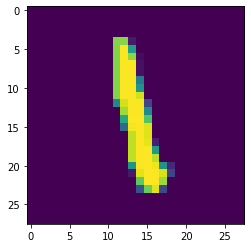

In [ ]:
some_element=int_train[0]
#print(some_element)
print(some_element.size)
print(type(some_element))

some_element=some_element.reshape(28,28)
import matplotlib.pyplot as plt
plt.imshow(some_element)

In [127]:
class Perceptron:
  global y_pred
  global y_pred_test
  global acc
  def __init__(self):
    y_pred=[]
    y_pred_test=[]
    acc=0
  # training the model
  def train(self,x_args,y_args):
    global y_pred
    y_pred=[]
    self.acc=0
  #global y_pred_test
    #x data
    for i in range(len(x_args)):
      #y labels
      weights_output_y=[]
      for j in range(10):
        #for each data dot product of all the labels
        #y(10x1) = w(10x784) , x(784x1)
        #calculation for every single label
        weights_output_y.append(np.dot(weights_x[j],x_args[i]))
      #print(weights_output_y)
      arg_y_pred=np.argmax(weights_output_y)# returns scalar value
      '''
      index=0
      maxx=-1
      temp_l=[]
      for i in range(10):
        if(weights_output_y[i]>=maxx):
          index=i
          maxx=weights_output_y[i]
      for i in range(10):
        if(i==index):
          temp_l.append(i)
        else:
          temp_l.append(0)
      self.y_pred.append(temp_l)
      '''
      y_pred.append(arg_y_pred)
      if(arg_y_pred!=y_args[i]):
        #increase weights for target class and decrease for predicted class
        #weights_x[i] = weights_x[i] + x_args[i]
        for p in range(10):
          '''
          weights_x[i] = weights_x[i] + x_args[i]
          weights_x[y_args[i]] = weights_x[y_args[i]] - x_args[i]
          '''
          if(p!=arg_y_pred):

            weights_x[p]=weights_x[p]+x_args[i]
          else:
            weights_x[p]=weights_x[p]-x_args[i]
      else:
        self.acc=self.acc+1
    #print(y_pred)
    #print()
    #print(weights_x[:4])
    print('Acc1,',self.acc/len(y_args))
    #print('Acc,',np.mean(y_pred == int_train_y))


  def test(self,x_args):
    global y_pred_test
    self.acc=0
    y_pred_test=[]
    for i in range(len(x_args)):
      #y labels
      weights_output_y=[]
      pred=[]
      for j in range(10):
        #for each data dot product of all the labels
        #y(10x1) = w(10x784) , x(784x1)
        #calculation for every single label
        #weights_output_y=np.dot(x_args[i],weights_x[j])

      #arg_y_pred=np.argmax(weights_output_y)# returns scalar value
        weights_output_y=np.dot(weights_x[j],x_args[i])
        pred.append(weights_output_y)
      weights_output_y=pred
      #print(weights_output_y)
      X_min = np.min(weights_output_y)
      X_max = np.max(weights_output_y)
      #X_norm = (X - X_min) / (X_max - X_min) * 9 + 1
      for k in range(10):
        weights_output_y[k]=int(((weights_output_y[k]-X_min) / (X_max - X_min) )* 9 + 1 )
      #print(weights_output_y)
      #arg_y_pred=np.argmax(weights_output_y)# returns scalar value
      
      y_pred_test.append(max(weights_output_y))#[arg_y_pred])
      '''
      index=0
      maxx=-1
      temp_l=[]
      for i in range(10):
        if(weights_output_y[i]>=maxx):
          index=i
          maxx=weights_output_y[i]
      for i in range(10):
        if(i==index):
          temp_l.append(i)
        else:
          temp_l.append(0)
      #self.
      y_pred_test.append(temp_l)
      '''
    #print(y_pred_test)
    print('Acc,',np.mean(y_pred_test == int_dev_y),)
  #def evaluate():
    #print(np.mean(y_pred == y_newtest))


In [128]:
p=Perceptron()
print(len(int_train))
#for i in range(100):

p.train(int_train,int_train_y)
#p.train(int_train,int_train_y)
#p.train(int_train,int_train_y)

50000
Acc1, 0.33778


In [129]:
p.test(int_dev)

Acc, 0.0


In [130]:
p.train(int_dev,int_dev_y)

Acc1, 0.3358


In [107]:
from sklearn.linear_model import Perceptron

clf = Perceptron()

clf.fit(x_data[:60000], y_data[:60000])

y_pred = clf.predict(x_test)

accuracy = clf.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.851


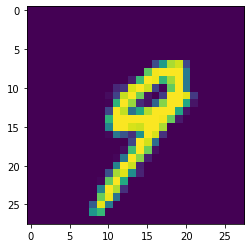

In [111]:

plt.imshow(x_data[10000].reshape(28,28))

In [131]:
from sklearn.dummy import DummyClassifier
sgd=DummyClassifier(  strategy='most_frequent',random_state=42)
sgd.fit(x_data[:60000], y_data[:60000])
sgd.predict(x_test)
eval = sgd.score(x_test, y_test)
print(eval)

0.1135
